In [90]:
from nanodrivers.visa_drivers.AWG import AWG
from nanodrivers.visa_drivers.locking import LOCKING
import pyvisa
#math
import numpy as np
from numpy import *
from scipy.optimize import curve_fit

#plotting
import matplotlib.pyplot as plt
import matplotlib

#matlab import
import scipy.io
from scipy.io import savemat

#file_store
import os
import copy

#time
from datetime import datetime, timedelta
import time

from ctypes import *
%matplotlib inline

In [92]:
rm = pyvisa.ResourceManager()
awg = rm.open_resource('GPIB0::13::INSTR')
awg.query('*IDN?')

VisaIOError: VI_ERROR_CONN_LOST (-1073807194): The connection for the given session has been lost.

In [93]:
loking = LOCKING(device_address = 'GPIB0::30::INSTR')
loking.idn()

VisaIOError: VI_ERROR_CONN_LOST (-1073807194): The connection for the given session has been lost.

In [8]:
awg.write(r'SOUR{}:FREQ {}'.format(str(1), str(3e6)))

22

In [89]:
freq = np.linspace(1.5, 2, 501)
state=dict()
state['freq'] = freq

X = np.array([])
Y = np.array([])
for i in range(len(freq)):
    awg.write(r'SOUR{}:FREQ {}'.format(str(1), str(freq[i]*1e6)))
    loking.write('*CLS\n')
    loking.write('*CLS')
    loking.write('*CLS')
    time.sleep(0.1)
    x0 = loking.get_X_data()
    x1 = loking.get_X_data()
    x2 = loking.get_X_data()
    x0 = loking.get_X_data()
    x1 = loking.get_X_data()
    x2 = loking.get_X_data()
    x0 = loking.get_X_data()
    x1 = loking.get_X_data()
    x2 = loking.get_X_data()
    x2 = loking.get_X_data()
    x0 = loking.get_X_data()
    x1 = loking.get_X_data()
    x2 = loking.get_X_data()
    X = np.append(X, loking.get_X_data())
    loking.write('*CLS\n')
    loking.write('*CLS')
    x0 = loking.get_Y_data()
    x1 = loking.get_Y_data()
    x2 = loking.get_Y_data()
    x0 = loking.get_Y_data()
    x1 = loking.get_Y_data()
    x2 = loking.get_Y_data()
    x0 = loking.get_Y_data()
    x1 = loking.get_Y_data()
    x2 = loking.get_Y_data()
    x1 = loking.get_Y_data()
    x2 = loking.get_Y_data()
    x0 = loking.get_Y_data()
    x1 = loking.get_Y_data()
    x2 = loking.get_Y_data()
    Y = np.append(Y, loking.get_Y_data())
state['X'] = X
state['Y'] = Y

now = datetime.now()  
folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\CoSi\Open_loop\error_func\with_TWPA'
file = r'ModulationFTest_'+ now.strftime(r'%H-%M-%S') + '.mat'
file_name = folder +'\\' + file
savemat(file_name, state)

VisaIOError: VI_ERROR_CONN_LOST (-1073807194): The connection for the given session has been lost.

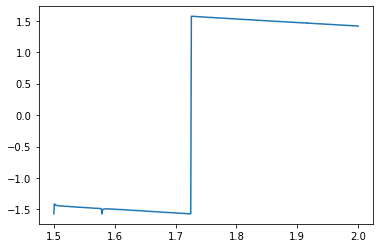

In [88]:
plt.plot(freq, np.arctan(Y/X))

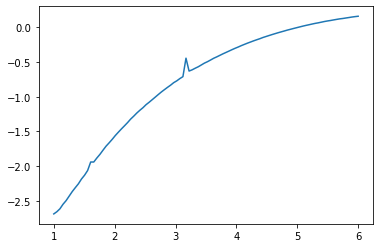

In [69]:
plt.plot(freq, Y*1000)

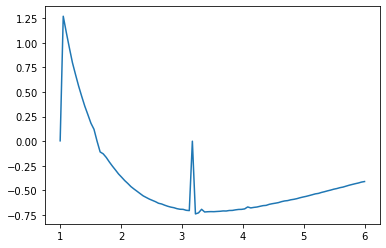

In [70]:
plt.plot(freq, X*1000)

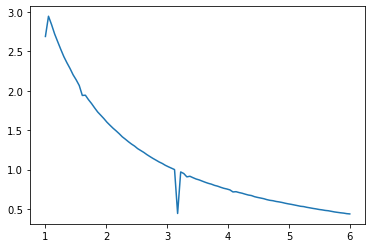

In [75]:
plt.plot(freq, np.sqrt((Y**2+X**2))*1000)

In [83]:
now = datetime.now()  
folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\CoSi\Open_loop'
file = r'ModulationFTest_'+ now.strftime(r'%H-%M-%S') + '.mat'
file_name = folder +'\\' + file
savemat(file_name, state)